Today's lecture will be a whirlwind tour of some of the major topics to be covered in this course. Don't worry if you don't understand everything. We will cover all of these topics in much more detail later.

## Data Visualization

Let us first import the `tidyverse` package using the `library` command

In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


Let us examine the `mpg` **data frame**.

In [2]:
print(mpg)

# A tibble: 234 × 11
   manufacturer      model displ  year   cyl      trans   drv   cty   hwy    fl
          <chr>      <chr> <dbl> <int> <int>      <chr> <chr> <int> <int> <chr>
1          audi         a4   1.8  1999     4   auto(l5)     f    18    29     p
2          audi         a4   1.8  1999     4 manual(m5)     f    21    29     p
3          audi         a4   2.0  2008     4 manual(m6)     f    20    31     p
4          audi         a4   2.0  2008     4   auto(av)     f    21    30     p
5          audi         a4   2.8  1999     6   auto(l5)     f    16    26     p
6          audi         a4   2.8  1999     6 manual(m5)     f    18    26     p
7          audi         a4   3.1  2008     6   auto(av)     f    18    27     p
8          audi a4 quattro   1.8  1999     4 manual(m5)     4    18    26     p
9          audi a4 quattro   1.8  1999     4   auto(l5)     4    16    25     p
10         audi a4 quattro   2.0  2008     4 manual(m6)     4    20    28     p
# ... with 224 more

As we can see this data frame (actually it is a **tibble**, a newer type of data frame) has 234 observations (rows) and 11 variables (columns). Only the first 10 rows and columns are displayed above.

The city mileage `cty` and highway mileage `hwy` should be correlated. Let us plot them.

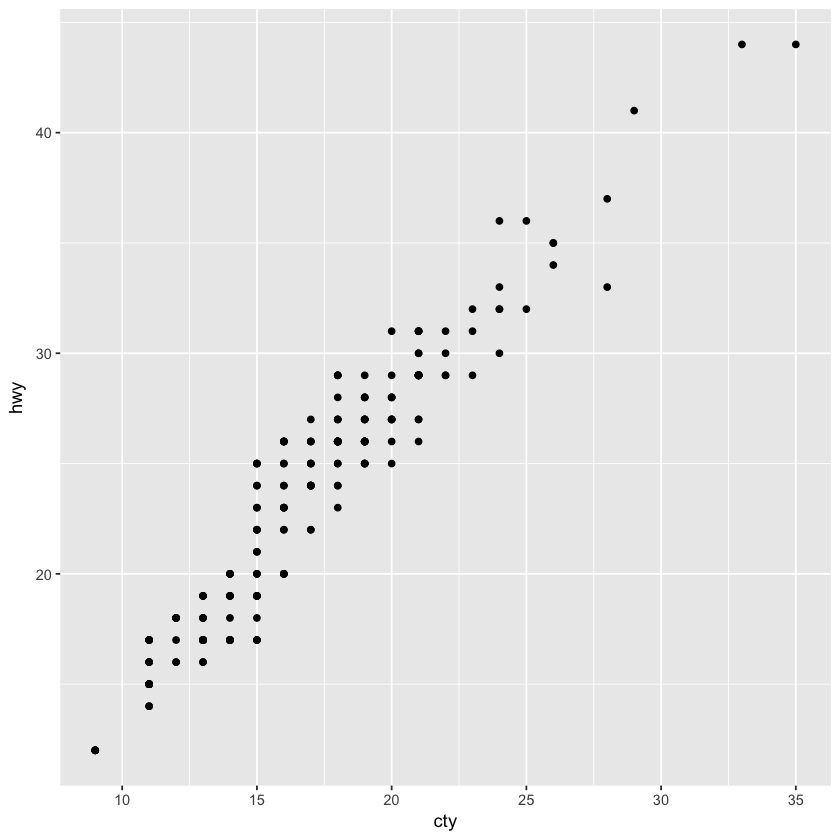

In [3]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = cty, y = hwy))

As expected, cars that tend to have a higher highway mileage also tend to have a higher city mileage. Let us try to use the class of the vehicle as a color in the above plot.

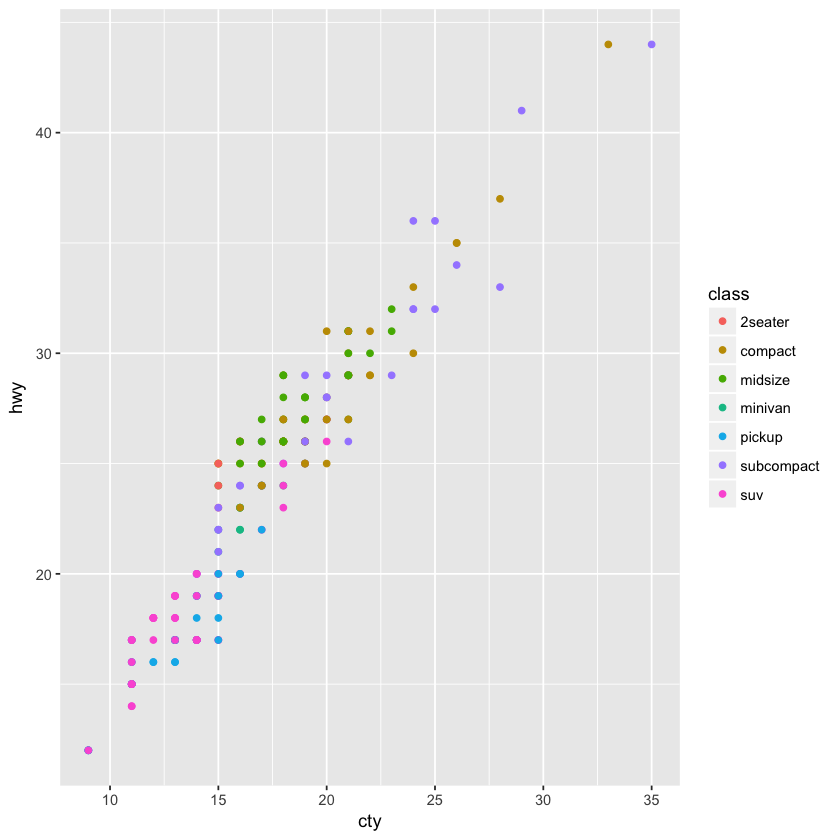

In [4]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = cty, y = hwy, color = class))

We see that compact and subcompact cars have the highest mileage whereas SUVs and pickup trucks have the lowest.

## Data Transformation

Let us load the `nycflight13` dataset that has information about all flights that departed New York area (airport codes JFK, EWR, LGA) in 2013.

In [5]:
library(nycflights13)

In [6]:
print(flights)

# A tibble: 336,776 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      544            545        -1     1004           1022
5   2013     1     1      554            600        -6      812            837
6   2013     1     1      554            558        -4      740            728
7   2013     1     1      555            600        -5      913            854
8   2013     1     1      557            600        -3      709            723
9   2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 336,766 more row

We have information about 336,776 flights. Let us find flights that had a departure delay of more than 1 hour.

In [7]:
filter(flights, dep_delay > 60)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,811,630,101,1047,830,137,MQ,4576,N531MQ,LGA,CLT,118,544,6,30,2013-01-01 06:00:00
2013,1,1,826,715,71,1136,1045,51,AA,443,N3GVAA,JFK,MIA,160,1089,7,15,2013-01-01 07:00:00
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00
2013,1,1,1114,900,134,1447,1222,145,UA,1086,N76502,LGA,IAH,248,1416,9,0,2013-01-01 09:00:00
2013,1,1,1120,944,96,1331,1213,78,EV,4495,N16561,EWR,SAV,117,708,9,44,2013-01-01 09:00:00
2013,1,1,1301,1150,71,1518,1345,93,MQ,4646,N542MQ,LGA,MSP,170,1020,11,50,2013-01-01 11:00:00
2013,1,1,1337,1220,77,1649,1531,78,B6,673,N636JB,JFK,LAX,352,2475,12,20,2013-01-01 12:00:00
2013,1,1,1400,1250,70,1645,1502,103,EV,4869,N748EV,LGA,MEM,178,963,12,50,2013-01-01 12:00:00
2013,1,1,1505,1310,115,1638,1431,127,EV,4497,N17984,EWR,RIC,63,277,13,10,2013-01-01 13:00:00


Let us sort the flights by departure delays, longest delays first.

In [8]:
arrange(flights, desc(dep_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00
2013,12,5,756,1700,896,1058,2020,878,AA,172,N5DMAA,EWR,MIA,149,1085,17,0,2013-12-05 17:00:00


We see that the most delayed flight was delayed by 1301 minutes. That's more than 21 hours! We also see that the rows at the bottom all have `NA` as the value of the variable `dep_delay`. That's how **missing values** are represented in R.

Let us find out what were the average delays for different months. You will notice two new things below. First, `<-` is the assignment operator in R. Second, enclosing an assignment in round brackets causes the assignment to be made as well as printed. 

In [9]:
by_month <- group_by(flights, year, month)
(monthly_averages <- summarise(by_month, delay = mean(dep_delay, na.rm = TRUE)))

year,month,delay
2013,1,10.036665
2013,2,10.816843
2013,3,13.227076
2013,4,13.938038
2013,5,12.986859
2013,6,20.846332
2013,7,21.727787
2013,8,12.611040
2013,9,6.722476
2013,10,6.243988


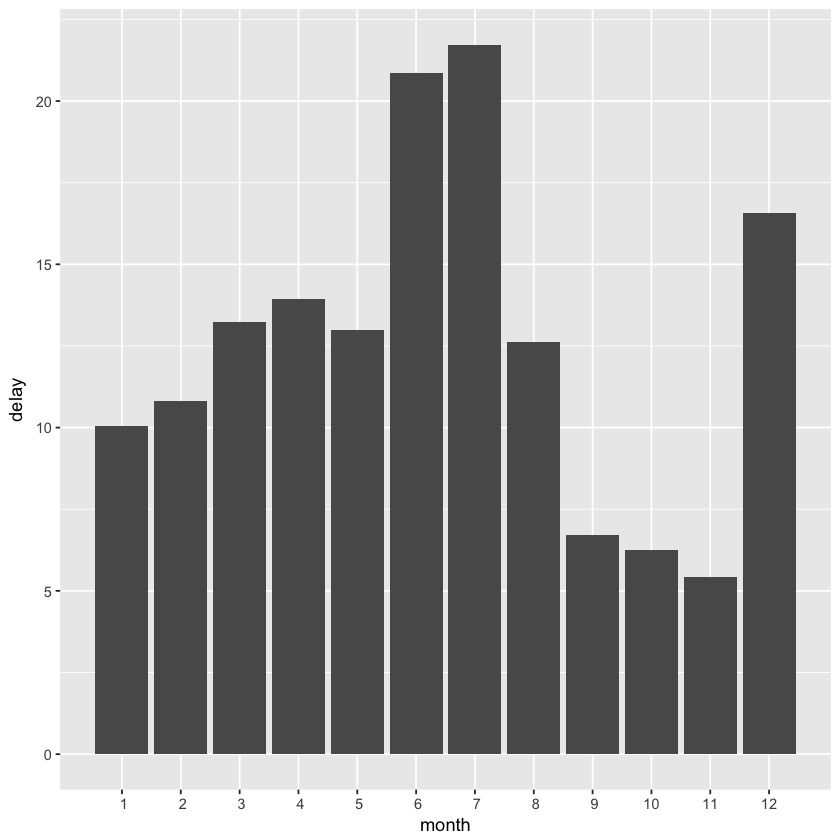

In [10]:
ggplot(data = monthly_averages) +
    geom_bar(mapping = aes(x = month, y = delay), stat = 'identity') +
    scale_x_discrete(limits = seq(1,12))

## Exploratory Data Analysis

Let us now look at `diamonds`, a dataset containing the prices and other information about almost 54,000 diamonds.

In [11]:
print(diamonds)

# A tibble: 53,940 × 10
   carat       cut color clarity depth table price     x     y     z
   <dbl>     <ord> <ord>   <ord> <dbl> <dbl> <int> <dbl> <dbl> <dbl>
1   0.23     Ideal     E     SI2  61.5    55   326  3.95  3.98  2.43
2   0.21   Premium     E     SI1  59.8    61   326  3.89  3.84  2.31
3   0.23      Good     E     VS1  56.9    65   327  4.05  4.07  2.31
4   0.29   Premium     I     VS2  62.4    58   334  4.20  4.23  2.63
5   0.31      Good     J     SI2  63.3    58   335  4.34  4.35  2.75
6   0.24 Very Good     J    VVS2  62.8    57   336  3.94  3.96  2.48
7   0.24 Very Good     I    VVS1  62.3    57   336  3.95  3.98  2.47
8   0.26 Very Good     H     SI1  61.9    55   337  4.07  4.11  2.53
9   0.22      Fair     E     VS2  65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good     H     VS1  59.4    61   338  4.00  4.05  2.39
# ... with 53,930 more rows
